In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
import pylab
import tensorflow as tf
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import statsmodels
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
import os

In [2]:
# Form dataset matrix
def create_dataset(dataset, previous=1):
	dataX, dataY = [], []
	for i in range(dataset.shape[0]-previous-1):
		a = dataset[i:(i+previous), :]
		dataX.append(a)
		dataY.append(dataset[i + previous, :])
	return np.array(dataX), np.array(dataY)

In [3]:
# fix random seed for reproducibility
np.random.seed(7)

# load dataset
df = read_csv('dccelectricitycivicsblocks34p20130221-1840.csv', engine='python', skipfooter=3)
df

,Civic Offices Blocks 3 and 4 KWh,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
0,Date,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
1,29/03/2011,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.80000305,31.20000076,31.65000153,30.60000038,32.85000229,31.05000305,32.10000229,31.35000229,31.65000153,30.15000153
2,30/03/2011,96,32.10000229,32.40000153,33.60000229,33,29.70000076,30.90000153,31.50000191,33,...,35.70000076,33.60000229,34.20000076,34.80000305,34.65000153,33.75,33.15000153,32.70000076,31.50000191,33.60000229
3,31/03/2011,96,32.10000229,33.60000229,35.10000229,33.45000076,31.20000076,31.35000038,34.20000076,33.75,...,33,33,35.25,34.35000229,32.40000153,31.20000076,32.84999847,33.45000076,32.10000229,32.10000229
4,01/04/2011,96,32.70000076,34.5,30.30000305,33,33,31.5,30.30000305,32.84999847,...,32.25,33.45000076,33,30.45000076,33.15000153,30.60000229,30.15000153,32.55000305,33,30.15000153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,13/02/2013,96,25,25,25.5,24.5,25,26,25.5,25.5,...,33,32.5,30.5,27.5,26,26,26,26,25.5,26.5
689,14/02/2013,96,26,25.5,26,25.5,25,27,25.5,26.5,...,31,30,30.5,29,28,26.5,25.5,25,25.5,25
690,15/02/2013,96,25.5,24.5,25.5,24.5,25,26.5,25,25.5,...,29,27,28,28,25.5,26,25.5,25.5,24.5,25
691,16/02/2013,96,25,25,24.5,24.5,24.5,26.5,25,25.5,...,24.5,24,24.5,26,24.5,24,25,24.5,25,24


In [4]:
df2=df.rename(columns=df.iloc[0])
df3=df2.drop(df.index[0])
df3
df3.drop(df3.index[0])
df4=df3.drop('Date', axis=1)
df5=df4.drop('Values', axis=1)
df5
df6=df5.dropna()
df7=df6.values
df7
dataset=np.array(df7, dtype=float)
dataset=dataset.reshape(-1,4)
dataset=np.sum(dataset,axis=1)
dataset

array([131.10000611, 125.1000042 , 121.80000496, ..., 100.5       ,
       102.5       ,  99.5       ])

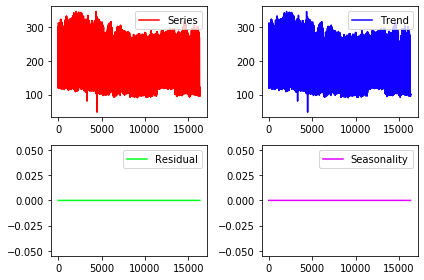

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(dataset, model='additive', freq=1)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(221)
plt.plot(dataset,color='#ff0000', label='Series')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend,color='#1100ff', label='Trend')
plt.legend(loc='best')
plt.tight_layout()
plt.subplot(223)
plt.plot(residual,color='#00ff1a', label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.subplot(224)
plt.plot(seasonal,color='#de00ff', label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

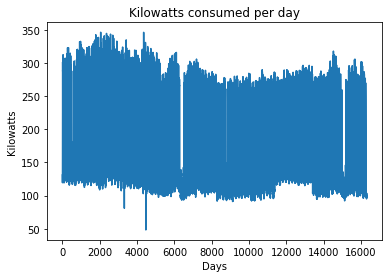

In [6]:
plt.plot(dataset)
plt.xlabel('Days')
plt.ylabel('Kilowatts')
plt.title("Kilowatts consumed per day")
plt.show()

std1=np.std(dataset)
mean1=np.mean(dataset)
cv1=std1/mean1 #Coefficient of Variation

from numpy import log
dataset = log(dataset)

std2=np.std(dataset)
mean2=np.mean(dataset)
cv2=std2/mean2 #Coefficient of Variation

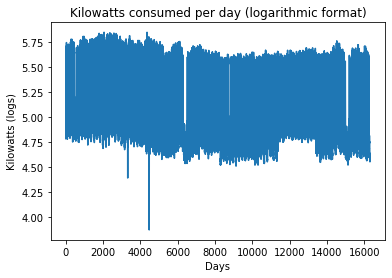

In [7]:
plt.plot(dataset)
plt.xlabel('Days')
plt.ylabel('Kilowatts (logs)')
plt.title("Kilowatts consumed per day (logarithmic format)")
plt.show()

/home/zenithal/C/sim_com/env_3.6/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


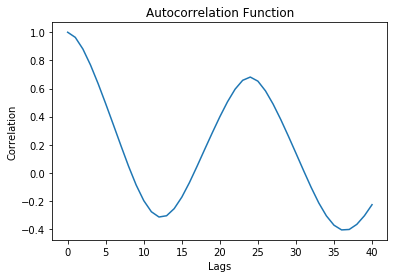

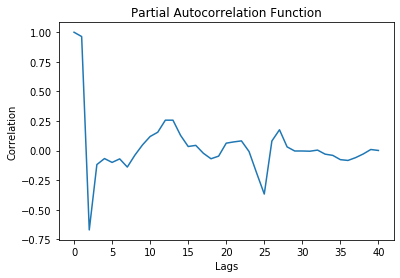

In [8]:
acf=statsmodels.tsa.stattools.acf(dataset)
plt.plot(acf)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title("Autocorrelation Function")
plt.show()
pacf=statsmodels.tsa.stattools.pacf(dataset)
plt.title("Partial Autocorrelation Function")
plt.plot(pacf)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.show()

In [9]:
# Dickey-Fuller Test
result = adfuller(dataset)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.295103
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [10]:
meankwh=np.mean(dataset)

dataset=dataset.reshape(-1,1)

# normalize dataset with MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.50752873],
       [0.48379145],
       [0.47024586],
       ...,
       [0.372847  ],
       [0.38283152],
       [0.36777997]])

In [11]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Training and Test data partition
dataset=dataset.reshape(-1,24)
train_size = int(dataset.shape[0] * 0.8)
test_size = dataset.shape[0] - train_size
train, test = dataset[0:train_size,:], dataset[train_size:dataset.shape[0],:]

# reshape into X=t-50 and Y=t (MODIFY TIME HERE)
for previous in range(1,51):
    X_train, Y_train = create_dataset(train, previous)
    X_test, Y_test = create_dataset(test, previous)

    X_train = X_train.reshape(X_train.shape[0],-1)
    Y_train = Y_train.reshape(Y_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    Y_test = Y_test.reshape(Y_test.shape[0],-1)

    # reshape input to be [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

    # Generate LSTM network
    model = tf.keras.Sequential()
    model.add(LSTM(4, input_shape=(1, X_train.shape[2])))
    model.add(Dense(Y_train.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs=150, batch_size=10, verbose=0)
    model.save(os.path.join('./model2','model'+str(previous)+'.h5'))
    print('model done for ', previous)

model done for  1
model done for  2
model done for  3
model done for  4
model done for  5
model done for  6
model done for  7
model done for  8
model done for  9
model done for  10
model done for  11
model done for  12
model done for  13
model done for  14
model done for  15
model done for  16
model done for  17
model done for  18
model done for  19
model done for  20
model done for  21
model done for  22
model done for  23
model done for  24
model done for  25
model done for  26
model done for  27
model done for  28
model done for  29
model done for  30
model done for  31
model done for  32
model done for  33
model done for  34
model done for  35
model done for  36
model done for  37
model done for  38
model done for  39
model done for  40
model done for  41
model done for  42
model done for  43
model done for  44
model done for  45
model done for  46
model done for  47
model done for  48
model done for  49
model done for  50


In [12]:
model.save(os.path.join('./model','model1.h5'))

(493, 1, 1200)
(493, 24)


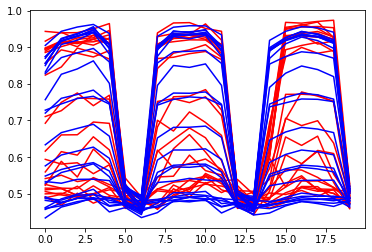

In [13]:
# Generate predictions
trainpred = model.predict(X_train)
testpred = model.predict(X_test)
plt.cla()
#plt.plot(trainpred[:50])
print (X_train.shape)
print (Y_train.shape)
plt.plot(Y_train[:20,0:],color='red')
plt.plot(trainpred[:20,0:],color='blue')
plt.show()


In [14]:
# Convert predictions back to normal values
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
testpred = scaler.inverse_transform(testpred)
Y_test = scaler.inverse_transform([Y_test])
predictions = testpred

# calculate RMSE
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_test[0], testpred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# Train predictions
trainpredPlot = np.empty_like(dataset)
trainpredPlot[:, :] = np.nan
trainpredPlot[previous:len(trainpred)+previous, :] = trainpred

# Test predictions
testpredPlot = np.empty_like(dataset)
testpredPlot[:, :] = np.nan
testpredPlot[len(trainpred)+(previous*2)+1:len(dataset)-1, :] = testpred

# Plot all predictions
inversetransform, =plt.plot(scaler.inverse_transform(dataset))
trainpred, =plt.plot(trainpredPlot)
testpred, =plt.plot(testpredPlot)
plt.xlabel('Days')
plt.ylabel('Kilowatt consumption (log)')
plt.title("Predicted vs. Actual Consumption")
plt.show()

ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
Y_test=np.exp(Y_test)
predictions=predictions.reshape(1,-1)
predictions=np.exp(predictions)

percentage_error=((predictions-Y_test)/Y_test)
percentage_error=abs(percentage_error)
mean=np.mean(percentage_error)
mean

In [ ]:
percentage_error=pd.DataFrame(percentage_error)
below10=percentage_error[percentage_error < 0.10].count()
all=percentage_error.count()
np.sum(below10)

In [ ]:
np.sum(all)